#**SUPPORT VECTOR MACHINE: Attrition prediction model**

### **Data preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = input("enter the route of the data (Attrition.csv)")
df = pd.read_csv(data)

enter the route of the data (Attrition.csv)/content/Attrition (3).csv


We'll drop the unnamed feature because it just replicates the index.

In [ ]:
df = df.drop(["Unnamed: 0"], axis = 1)


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


Let's understand our data with some descriptive statistic

In [ ]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##**Why do we want to use SUPPORT VECTOR MACHINE?**
 




We want to do a binary classification of the Attrition of workers in companies, we use SVM's because while other models, such as perceptron aren't able to generalize well enough, svm's find what is supposed to be the best dividing line for linear classification, the one in the middle, equidistant.

We also decided to go for the SVM because it can be easily transformed to a non linear classifier. Thseon linear decision boundaries are found thanks to the Kernel trick.

Extra reasons for choosing SVM are:


1.   It does not get stuck in local optima, the solution is just one global optima.
2.   There are not too many hyperparameters to use, this is nice because, as we will only have 2 hyperparmeters it will make our search space just square , not cube or so on. ([Course of dimensionality](https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb)). 
3.   SVM's are truly powerful, more than naive bayes, logistic regression, trees and etc.
4.   Our dataset, is not too big, and this is good for SVM's because they will be able to scale, as they require the calculation of a kernel matrix, whis is a NxN matrix (where N is the number of samples), then the algorithm, as it reuires the kernel trick, will be at least of N², and in practice probably N³.

## **Set up**

Import some useful libraries

In [ ]:
import sklearn
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Transform the 1 to Yes and the 0 to No for the attrition column via list comprehension

In [ ]:
df['Attrition'] = ['Yes' if A == 1 else 'No' for A in df['Attrition'] ]

We visualize our data now:

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,No,2,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,No,2,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,No,1,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Most of the instances of our dataset are not willing to quit and don't suffer attrition, as you can see in the following plot:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


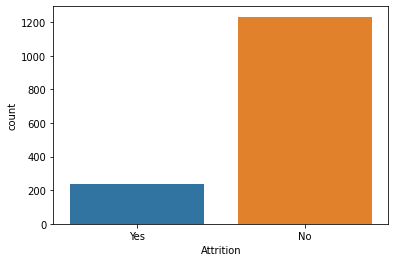

In [ ]:
sns.countplot(df['Attrition'])

##**Plots: attrition in the spotlight.**

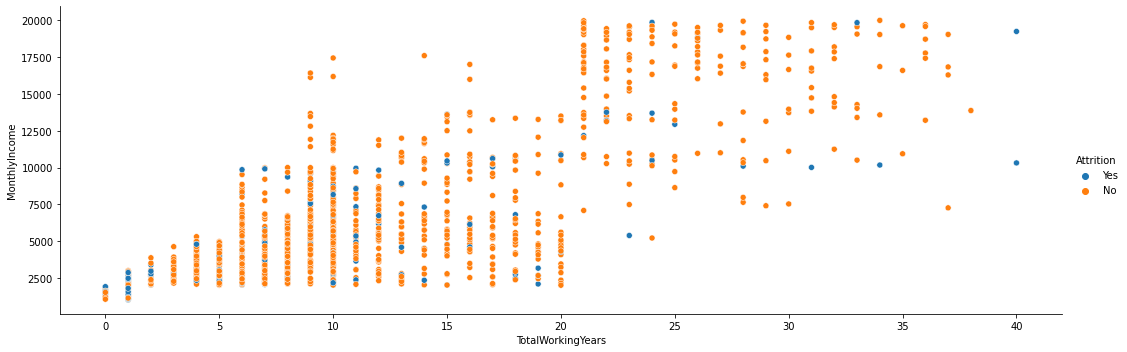

In [ ]:
sns.relplot(x='TotalWorkingYears', y='MonthlyIncome', hue = 'Attrition', data = df, height = 5, aspect = 3)

If we see this plot carefully we will discover that monthly income has a great impact in the attrition level, Even young workers that have just started their carreer suffer attrition when salariies are low.

We can also see that Total working years are also important, many workers with great experience are feel attrited even if good salaries, while this does not happen normally with ambitious young workers.

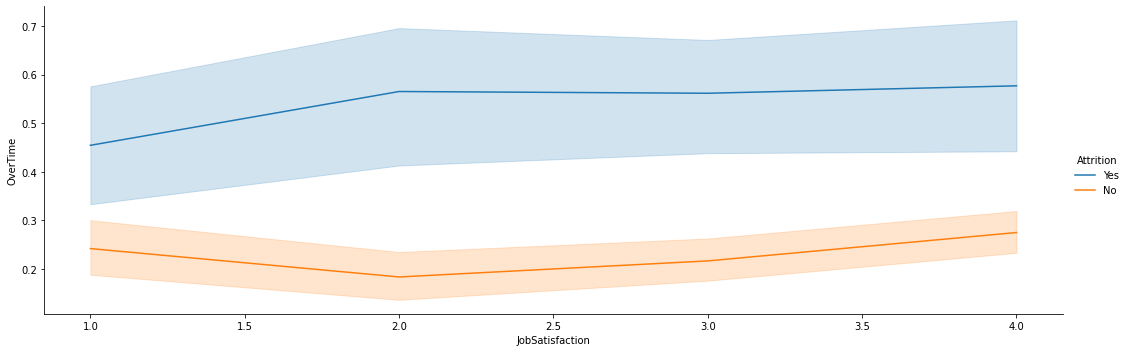

In [ ]:
sns.relplot(x='JobSatisfaction', y='OverTime', hue = 'Attrition', kind ='line', data = df, height = 5, aspect = 3)

In ths plot we can see a very interresting phenomenon. It seems that attrited workers are the ones with more extra hours. On the other hand workers that are happy with their job tend to have less extra hours. Even though we can see a peak on Job satisfaction of not attrited workers when they do OverTime, maybe due to the acomplishment of new projects in a shorter time. 

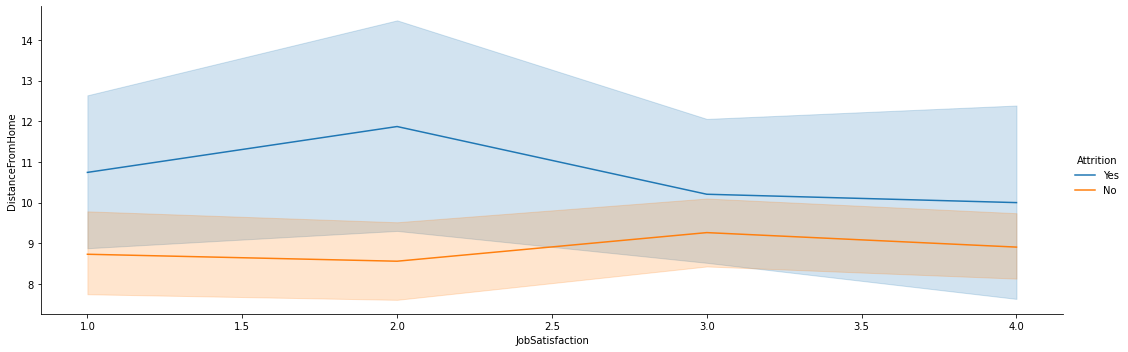

In [ ]:
sns.relplot(x='JobSatisfaction', y='DistanceFromHome', hue = 'Attrition', kind='line', data = df, height = 5, aspect = 3)

As we can observe in this graphic, the bigger the distance from home is, the more workers suffer attrition, and the lower their job satisfaction is. Actually we all know that commuting is not a funny activity, even less if that Overtime is not included in your income.

##**Model building**

We will start stating which will be our target 

In [ ]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition']

Let's split the data to train and test our model

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 ) 

First of all we'll standarize our data, using the z score standarization:

 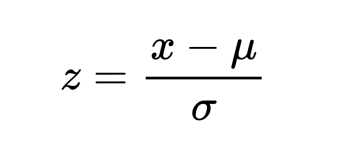

We need standarization because  the data obtained may contain features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely. This fact will lead to biased outcomes when we make predictions. Thus, We should always scale the data prior to modeling.

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)



We chose to do the SVM with a linear kernel as it worked the best for us in previous tests, where we also checked rbf and polynomial kernels. 

First want to find the best parameters for the SVM, using the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  parameter estimator:

In [ ]:
parameters = {'C':[0.1, 1, 10], "gamma":[0.001, 0.01, 0.1, 1, 10, 100]} # Checking some possible values for the C and parameters
clf = svm.SVC(kernel='linear') # Linear kernel
grid = GridSearchCV(clf, parameters, verbose = 10)
grid.fit(X_train, y_train)

print("The best parameters are {} with a score of {:0.3f}".format(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=0.1, gamma=0.001.........................................
[CV 1/5; 1/18] END ..........C=0.1, gamma=0.001;, score=0.856 total time=   0.0s
[CV 2/5; 1/18] START C=0.1, gamma=0.001.........................................
[CV 2/5; 1/18] END ..........C=0.1, gamma=0.001;, score=0.902 total time=   0.0s
[CV 3/5; 1/18] START C=0.1, gamma=0.001.........................................
[CV 3/5; 1/18] END ..........C=0.1, gamma=0.001;, score=0.851 total time=   0.0s
[CV 4/5; 1/18] START C=0.1, gamma=0.001.........................................
[CV 4/5; 1/18] END ..........C=0.1, gamma=0.001;, score=0.881 total time=   0.0s
[CV 5/5; 1/18] START C=0.1, gamma=0.001.........................................
[CV 5/5; 1/18] END ..........C=0.1, gamma=0.001;, score=0.860 total time=   0.0s
[CV 1/5; 2/18] START C=0.1, gamma=0.01..........................................
[CV 1/5; 2/18] END ...........C=0.1, gamma=0.01;

We find out that the best parameters are C = 0.1 and gamma = 0.001

Now let's start building our Support vector classifier model with [sklearn's svm.SVC()](https://scikit-learn.org/stable/modules/svm.html) using the best parameters found:

In [ ]:
clf = svm.SVC(C = 0.1,  kernel= 'linear', gamma = 0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.90      0.97      0.93       255
         Yes       0.61      0.28      0.39        39

    accuracy                           0.88       294
   macro avg       0.75      0.63      0.66       294
weighted avg       0.86      0.88      0.86       294



The low results on the recall and f1 score of the Yes option are due to the quanntity of support vectors we do have for the 'Yes' option, nevertheless accuracy, as you can see, is nice.

In [ ]:
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))

confusion matrix:
 [[248   7]
 [ 28  11]]


In [ ]:
print('accuracy of our classifier:',accuracy_score(y_test, y_pred))

accuracy of our classifier: 0.8809523809523809


The accuracy is nice, the svm worked quite okay.

##**Specific cases and examples**

We now will create persons with given characteristics and let's say if it suffers from attrition and will be willing to quit or not:

Let's start with Dimos.

We are wondering if Dimos will be suffering attrition and will be thinking about quiting, as we do now that he works so hard.

In order to classify if he is or not in that situation, we will set its attributes and characteristics, subsequently will push the 'Dimos' datapoint into our Support Vector Machine classifier.

In [ ]:
Dimos = [[
          30,         #0age
          #           #attrition value to predict
          3,          #1business travel
          1020,       #2daily rate
          2,          #3department
          13,         #4distance from home
          5,	        #5eduction
          5,	        #6education field
          4,	        #7environment satisfaction
          1,	        #8gender
          99,         #9Hourly rate
          4,	        #10job involvement
          6,	        #11job level
          4,          #12job role
          2,          #13job satisfaction
          2,          #14marital status
          19206,      #15 Monthly Income
          16117,      #16monthly rate
          2,          #17numcompanies worked
          0,          #18over time
          30,         #19percent salary hike
          3,          #20performance rating
          4,          #21relations satisfaction
          0,          #22stock option levels
          12,         #23total working years
          5,          #24training times last years
          3,          #25work life balance
          10,         #26years at company
          1,          #27years in current role
          1,          #28years since last promotion
          8]]         #29years with current manager
Dimos = std.transform(Dimos)
pred_Dimos = clf.predict(Dimos)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print('Will dimos suffer attrition? :',pred_Dimos)

Will dimos suffer attrition? : ['No']


Let's create another instance: Ana

We got the data of Ana from a company's dataset and we were horrified about her salary and some conditions, nonetheless, we might be biased so we decided to apply our algorithm to her case too, in order to see if she feels like that and she is willing to quit or not. 

So let's apply it:

In [ ]:
Ana = [[
          57,         #0age
          #           #attrition value to predict
          1,          #1business travel
          207,       #2daily rate
          0,          #3department
          9,         #4distance from home
          1,	        #5eduction
          3,	        #6education field
          2,	        #7environment satisfaction
          0,	        #8gender
          23,         #9Hourly rate
          2,	        #10job involvement
          1,	        #11job level
          1,          #12job role
          1,          #13job satisfaction
          0,          #14marital status
          2700,      #15 Monthly Income
          1611,      #16monthly rate
          7,          #17numcompanies worked
          4,          #18over time
          -10,         #19percent salary hike
          2,          #20performance rating
          1,          #21relations satisfaction
          0,          #22stock option levels
          34,         #23total working years
          0,          #24training times last years
          1,          #25work life balance
          9,         #26years at company
          9,          #27years in current role
          12,          #28years since last promotion
          9]]         #29years with current manager

Ana = std.transform(Ana)
pred_Ana = clf.predict(Ana)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print('Will Ana suffer attrition? :',pred_Ana)

Will Ana suffer attrition? : ['Yes']


The results of Ana's and Dimos' predictions are just a probability, even if our model has a high accuracy, it can fail and maybe Dimos is not as happy as he seems, or Ana s actually not willing to quit.

Also take into account that the values were absolutely invented, Dimos is not real and Ana neither, we invented the value of their salaries, age, marital status, and every single value of each feature.